In [1]:
import sys 
sys.path.append("/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/00.Libs")
import RS_dataset
import RS_models
import RS_utils

import torchvision
import torch.nn as nn 
from torchvision.datasets import VOCDetection
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms.functional import to_tensor, to_pil_image
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import albumentations as A
import os
import numpy as np 
import time
import matplotlib.pyplot as plt
import cv2
import torch 
from typing import Dict, Any, List
import numpy as np
from PIL import Image
import xml.etree.ElementTree as ET
import collections
#---
from lightning.fabric import Fabric
import lightning as L

import torch




# VOC class names

#---------------------------------
#-- args operation
EXEC_VER = 25 # zero means test 
DDP = False
TASK = "FACE_Detection"
IMAGES_PATH =  '/mnt/hdd/eric/.tmp_ipy/00.Data/FaceMaskDetection/images/'
IMAGES_PATH_TEST =  '/mnt/hdd/eric/.tmp_ipy/00.Data/FaceMaskDetection/test_images/'
ANNO_PATH = "/mnt/hdd/eric/.tmp_ipy/00.Data/voc/VOCdevkit/VOC2007/Annotations"

#-- args data
#IMAGE_HEIGHT = 150
#IMAGE_WIDTH  = 150
IMAGE_SIZE = 400 
#-- args modeling 
MODEL_NAME = "FasterRCNN"
BATCH_SIZE = 6 
LEARNING_RATE = 0.005 
N_CLASSES = 4
#-- args train
DEVICE = "cuda:0"
DEVICES = [0,1,2,3]
RESUME = False
SAVE_EPOCH = 10
EPOCHS = 140
DATA_SHUFFLE = True
#-- args category
# VOC class names 
CALSSES = [
    "background", "person", "mask1", "mask2"
]

#-- logger 
log_path = f'/mnt/hdd/eric/.tmp_ipy/15.Lab_Detection/01.Models/09.Oriented_RCNN/01.log/ver_{EXEC_VER}_%Y-%m-%d_%H-%M-%S.log'
logger = RS_utils.log_creator(log_path)

data_transform = transforms.Compose([  
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])


scale = 1 
data_aug = A.Compose([
    A.LongestMaxSize(max_size=int(IMAGE_SIZE * scale)),
    # min_size보다 작으면 pad
    A.PadIfNeeded(min_height=int(IMAGE_SIZE * scale), min_width=int(IMAGE_SIZE * scale), border_mode=cv2.BORDER_CONSTANT)],
    #A.CenterCrop(height=120, width=120)],
    #A.LongestMaxSize(max_size=200, interpolation=cv2.INTER_LINEAR,always_apply=True)],
    #A.Resize(height=IMAGE_HEIGHT,width=IMAGE_WIDTH,interpolation=cv2.INTER_LINEAR)],
    bbox_params=A.BboxParams(format='pascal_voc',label_fields=['category_ids']) )

# def collate_fn(batch):
#     return tuple(zip(*batch))

train_dataset = RS_dataset.MaskDataset_v2(data_transform, IMAGES_PATH, data_aug)
#test_dataset = RS_dataset.MaskDataset(data_transform, IMAGES_PATH_TEST)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, collate_fn=train_dataset.collate_fn, shuffle=DATA_SHUFFLE)
#test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=2, collate_fn=test_dataset.collate_fn,shuffle=False)

#-------------------------------------------------------------------------------------------

# from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

/mnt/hdd/eric/.conda/envs/8.tmp.copied/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
train_dataset.__getitem__(0)[0].shape,train_dataset.__getitem__(1)[0].shape,train_dataset.__getitem__(2)[0].shape

(torch.Size([3, 400, 400]),
 torch.Size([3, 400, 400]),
 torch.Size([3, 400, 400]))

In [3]:
d0 = train_dataset.__getitem__(16)
d1 = train_dataset.__getitem__(17)
d2 = train_dataset.__getitem__(18)
d0[1].shape, d1[1].shape,d2[1].shape

(torch.Size([2, 4]), torch.Size([7, 4]), torch.Size([13, 4]))

In [4]:
d0[1].shape, d1[1].shape,d2[1].shape

(torch.Size([2, 4]), torch.Size([7, 4]), torch.Size([13, 4]))

In [6]:
from glob import glob
img_list = glob(os.path.join(IMAGES_PATH, "*.png"))

In [9]:
# for i in img_list:
#     img_ = Image.open(i)
#     img_ = np.asarray(img_)
#     print(img_.shape)

In [17]:
img , box, label = train_dataset.__getitem__(0)[0],train_dataset.__getitem__(0)[1],train_dataset.__getitem__(0)[2]

In [18]:
img.shape

torch.Size([3, 400, 400])

In [19]:
torch.mean(img)

tensor(-0.4126)

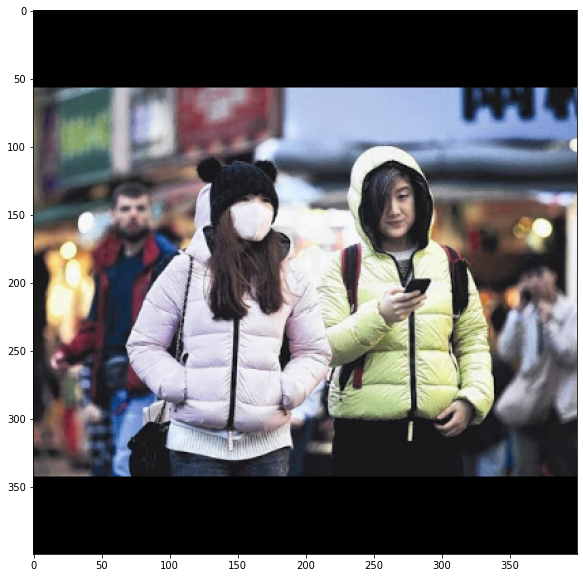

In [20]:
RS_utils.torch_display(img,batch=False,denormal=True)

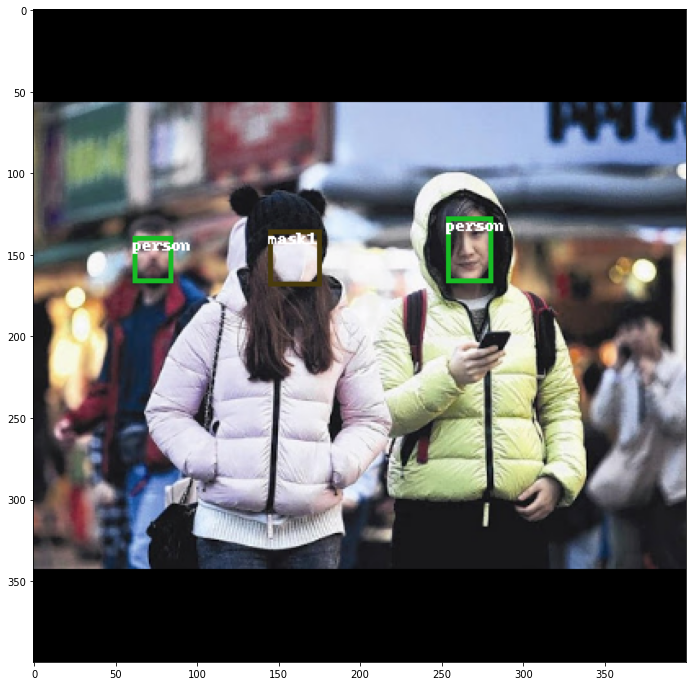

In [25]:
RS_utils.show_box(img,box,label,CALSSES,denormal=True )